In [1]:
import pandas as pd
import seaborn as sns
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import os


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

if not os.path.isdir('./RandomForest'):
  !git clone https://github.com/elisaboccini/RandomForest
  

Cloning into 'RandomForest'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [3]:
from RandomForest.random_forest import RandomForest
from RandomForest.decisiontree import DecisionTree

In [5]:
'''Implementation on the dataset'''

df_train = pd.read_csv('drive/My Drive/fashion_mnist_data/fashion-mnist_train.csv')     
df_test = pd.read_csv('drive/My Drive/fashion_mnist_data/fashion-mnist_test.csv')


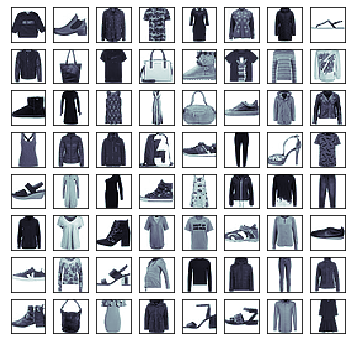

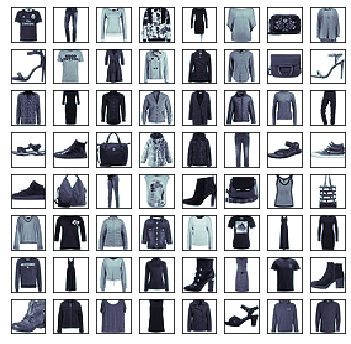

In [6]:
#visualize images
Xtrain = df_train.drop('label', 1)
plt.figure(figsize=(6,6))
for digit_num in range(0,64):
    plt.subplot(8,8,digit_num+1)
    grid_data = Xtrain.iloc[digit_num].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    plt.xticks([])
    plt.yticks([])

Xtest = df_test.drop('label', 1)
plt.figure(figsize=(6,6))
for digit_num in range(0,64):
    plt.subplot(8,8,digit_num+1)
    grid_data = Xtest.iloc[digit_num].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    plt.xticks([])
    plt.yticks([])

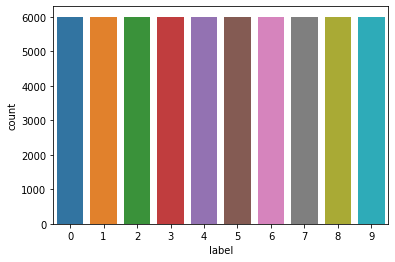

In [7]:
#check whether there are null values in the df
df_train.isnull()
df_train.isnull().sum().sum()
#check if classes are balanced
sns.countplot(x="label", data=df_train)

train_X = df_train.drop("label",1).values 
train_y = df_train['label'].values 
 

In [ ]:
#learning the tree
tree = DecisionTree()
tree.fit(train_X, train_y)

In [ ]:
#computing the training error
trainpred = tree.predict(train_X)
error(train_y, trainpred)

18.659999999999997

[0 1 2 ... 8 6 6]


21.060000000000002

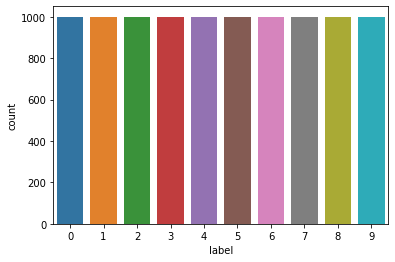

In [ ]:
#Predictions on the test set
df_test.isnull()
df_test.isnull().sum().sum()
#check if classes are balanced
sns.countplot(x="label", data=df_test)

test_X = df_test.drop("label",1).values
test_y = df_test['label'].values

results = tree.predict(test_X)
print(results)

accuracy(test_y, results)

error(test_y, results)

In [ ]:
#RandomForest
#6000 obs in the bootstrapped subsample
rf10 = RandomForest(n_trees = 10)
rf10.fit(train_X,train_y)
rfpred10 = rf10.predict(test_X)
accuracy10 = accuracy(test_y, rfpred10)

In [ ]:
rf50 = RandomForest(n_trees = 50)
rf50.fit(train_X,train_y)
rfpred50 = rf50.predict(test_X)
accuracy50 = accuracy(test_y, rfpred50)

In [ ]:
rf100 = RandomForest(n_trees = 100)
rf100.fit(train_X,train_y)
rfpred100 = rf100.predict(test_X)
accuracy100 = accuracy(test_y, rfpred100)

In [ ]:
rf150 = RandomForest(n_trees = 150)
rf150.fit(train_X,train_y)
rfpred150 = rf150.predict(test_X)
accuracy150 = accuracy(test_y, rfpred150)

In [ ]:
rf200 = RandomForest(n_trees = 200)
rf200.fit(train_X,train_y)
rfpred200 = rf200.predict(test_X)
accuracy200 = accuracy(test_y, rfpred200)

Text(0, 0.5, 'Accuracy')

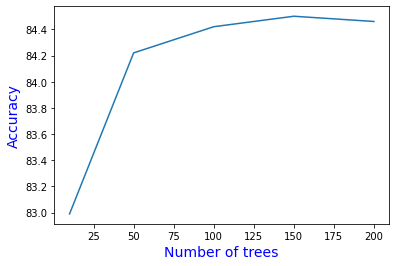

In [ ]:
#for subsample of 6000 obs
n_estimators = [10, 50, 100, 150, 200]
accuracylevel = [accuracy10, accuracy50, accuracy100, accuracy150 , accuracy200]


plt.plot(n_estimators, accuracylevel)
plt.xlabel('Number of trees', fontsize=14, color='blue')
plt.ylabel('Accuracy',fontsize=14,color='blue')


In [ ]:
#changing the bootstrap default value to 1200
newrf10 = RandomForest(n_trees = 10)
newrf10.fit(train_X,train_y)
newrfpred10 = newrf10.predict(test_X)
newaccuracy10 = accuracy(test_y, newrfpred10)

newrf50 = RandomForest(n_trees = 50)
newrf50.fit(train_X,train_y)
newrfpred50 = newrf50.predict(test_X)
newaccuracy50 = accuracy(test_y, newrfpred50)

newrf100 = RandomForest(n_trees = 100)
newrf100.fit(train_X,train_y)
newrfpred100 = newrf100.predict(test_X)
newaccuracy100 = accuracy(test_y, newrfpred100)

newrf150 = RandomForest(n_trees = 150)
newrf150.fit(train_X,train_y)
newrfpred150 = newrf150.predict(test_X)
newaccuracy150 = accuracy(test_y, newrfpred150)

newrf200 = RandomForest(n_trees = 200)
newrf200.fit(train_X,train_y)
newrfpred200 = newrf200.predict(test_X)
newaccuracy200 = accuracy(test_y, newrfpred200)


In [ ]:
newrf250 = RandomForest(n_trees = 250)
newrf250.fit(train_X,train_y)
newrfpred250 = newrf250.predict(test_X)
newaccuracy250 = accuracy(test_y, newrfpred250)

In [ ]:
newrf300 = RandomForest(n_trees = 300)
newrf300.fit(train_X,train_y)
newrfpred300 = newrf300.predict(test_X)
newaccuracy300 = accuracy(test_y, newrfpred300)

In [ ]:
#for subsample of 1200 obs
n_estimators2 = [10, 50, 100, 150, 200, 250, 300]
accuracylevel2 = [newaccuracy10, newaccuracy50, newaccuracy100, newaccuracy150, newaccuracy200, newaccuracy250, newaccuracy300]

plt.plot(n_estimators2, accuracylevel2)
plt.xlabel('Number of trees', fontsize=14, color='blue')
plt.ylabel('Accuracy',fontsize=14,color='blue')
